In [17]:
import numpy as np
from matplotlib import pyplot as plt
from supermariopy import plotting
plotting.set_style()

In [18]:
def toy_example(n_P=20, outlier_ratio=0.1):
    x = np.linspace(0, 10, n_P)
    y = x.copy()
    n_outliers = int(n_P * outlier_ratio)
    # definition of outlier: uniform additive error model on interval [0, 10]
    
    o = np.random.uniform(-1, 1, n_outliers) * 10
    idx = np.random.choice(np.arange(n_P), n_outliers, replace=False)
    y[idx] += o
    return x, y

def original_example():
    x = np.array([0, 1, 2, 3, 3, 4, 10])
    y = np.array([0, 1, 2, 2, 3, 4, 2])
    return x, y

# P corrupted with Gaussian Error

In [19]:
def fit_model(S):
    x = S[:, 0]
    x_aug = np.stack([x, np.ones_like(x)], axis=1)
    y = S[:, 1]
    M, _, _, _ = np.linalg.lstsq(x_aug, y)
    return M


In [22]:
x = np.arange(0, 7)
y = x.copy() + np.random.randn(*x.shape) * 0.5
P = np.stack([x, y], axis=1)
M = fit_model(P)

/home/sandro/anaconda3/envs/supermariopy/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


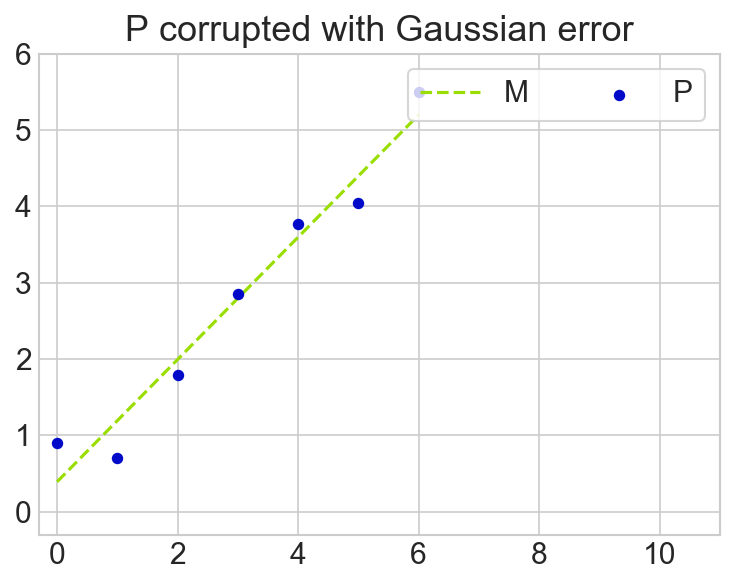

In [23]:
with plt.rc_context(plotting.BLOG_RC_PARAMS_5x4):
    colors = plotting.get_palette("custom6")
    plt.scatter(P[:, 0], P[:, 1], label="P", s=20, zorder=3, marker="o", color=colors[0])
    plt.plot(P[:, 0], M[0] * P[:, 0] + M[1], label="M", color=colors[3], zorder=1, linestyle="--")
    plt.title("P corrupted with Gaussian error")
    handles, labels = plt.gca().get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    plt.legend(handles, labels, loc="upper right", ncol=2, frameon=True)
    plt.xlim([-0.3, 11])
    plt.ylim([-0.3, 6])
    plt.tight_layout()
    plt.savefig("P_gaussian.png")

# P corrupted with outlier

In [15]:
x, y = original_example()
P = np.stack([x, y], axis=1)
M = fit_model(P)

/home/sandro/anaconda3/envs/supermariopy/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


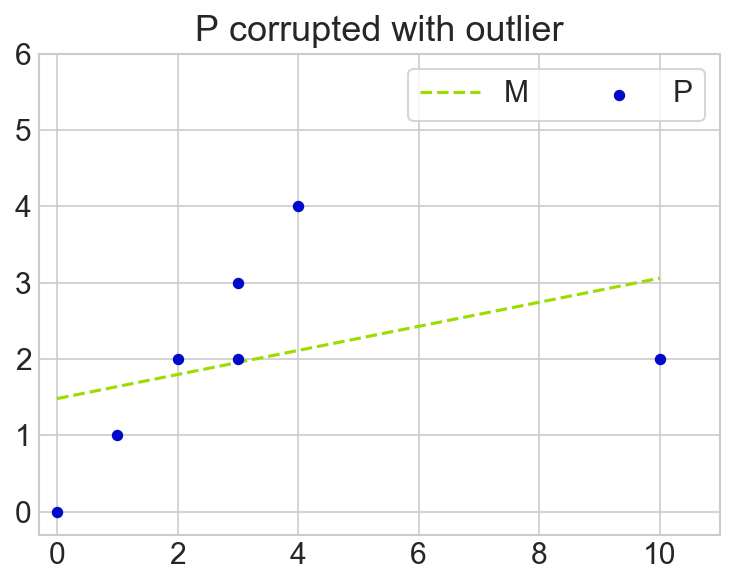

In [16]:
with plt.rc_context(plotting.BLOG_RC_PARAMS_5x4):
    colors = plotting.get_palette("custom6")
    plt.scatter(P[:, 0], P[:, 1], label="P", s=20, zorder=3, marker="o", color=colors[0])
    plt.plot(P[:, 0], M[0] * P[:, 0] + M[1], label="M", color=colors[3], zorder=1, linestyle="--")
    plt.title("P corrupted with outlier")
    handles, labels = plt.gca().get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    plt.legend(handles, labels, loc="upper right", ncol=2, frameon=True)
    plt.xlim([-0.3, 11])
    plt.ylim([-0.3, 6])
    plt.tight_layout()
    plt.savefig("P_outlier.png")